<a href="https://colab.research.google.com/github/fatemehsafaee/ML-miniPjoject1/blob/main/ML_miniProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# student: Fateme Safaee , 40207974

# question1, 2:

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

(1000, 3) (1000,)


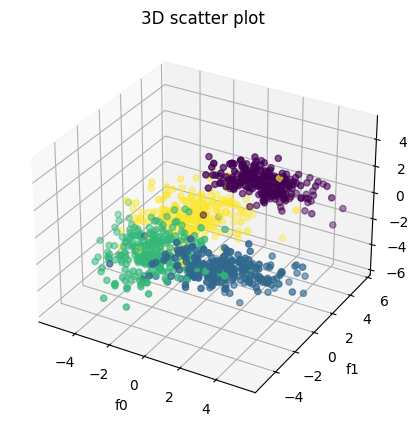

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=4,
                           n_features=3, n_informative=3,
                           n_redundant=0, random_state=74,
                           n_clusters_per_class=1,
                           class_sep = 2)


print(X.shape, y.shape)

fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

ax.set_title("3D scatter plot")
ax.set_xlabel("f0")
ax.set_ylabel("f1")
ax.set_zlabel("f2")

plt.show()

# question1, 3:

## logistic regression:

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 3), (200, 3), (800,), (200,))

In [ ]:
model = LogisticRegression(solver='sag', random_state=74, max_iter = 2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
print(f'trian accuracy = ', acc_train)
print(f'test accuracy = ', acc_test)

trian accuracy =  0.9425
test accuracy =  0.925


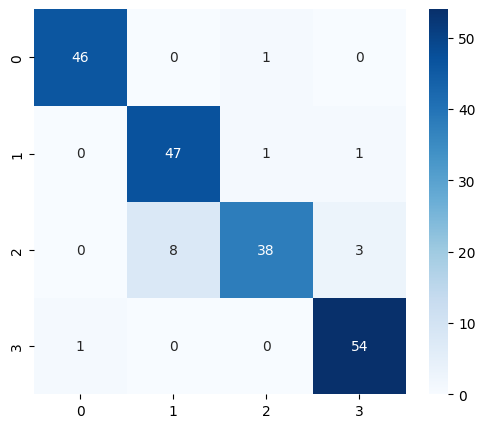

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

## SGD:

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# using standard scaler:
model1 = SGDClassifier(random_state=74, max_iter=2000)
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test)

In [ ]:
acc_train1 = model1.score(X_train, y_train)
acc_test1 = model1.score(X_test, y_test)
print(f'trian accuracy = ', acc_train1)
print(f'test accuracy = ', acc_test1)

trian accuracy =  0.9375
test accuracy =  0.92


In [ ]:
model2 = SGDClassifier(learning_rate='adaptive', eta0=0.01, random_state=74, max_iter=2000)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [ ]:
acc_train2 = model2.score(X_train, y_train)
acc_test2 = model2.score(X_test, y_test)
print(f'trian accuracy = ', acc_train2)
print(f'test accuracy = ', acc_test2)

trian accuracy =  0.9425
test accuracy =  0.925


# question1, 4:

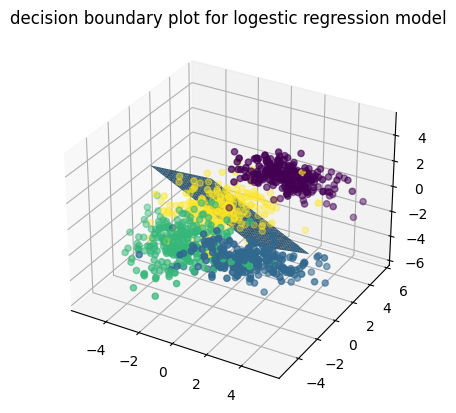

In [ ]:
# logestic regression

import numpy as np
tmp = np.linspace(-3, 3, 51)
X1, X2 = np.meshgrid(tmp, tmp)

z = lambda X1, X2: (-model.intercept_[0] - model.coef_[0][0] * X1 - model.coef_[0][1] * X2) / model.coef_[0][2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, z(X1, X2), alpha=0.9)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_title('decision boundary plot for logestic regression model')
plt.show()

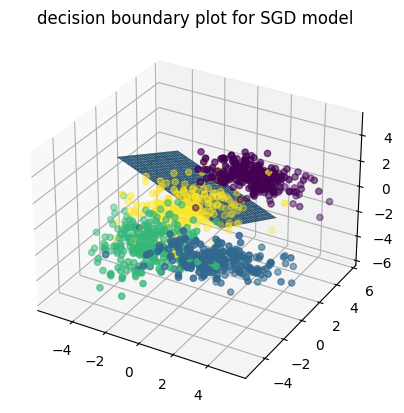

In [ ]:
# model2 = SGD

z = lambda X1, X2: (-model2.intercept_[0] - model2.coef_[0][0] * X1 - model2.coef_[0][1] * X2) / model2.coef_[0][2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, z(X1, X2), alpha=0.9)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_title('decision boundary plot for SGD model')
plt.show()


plot_decision on a 2D dataset:

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


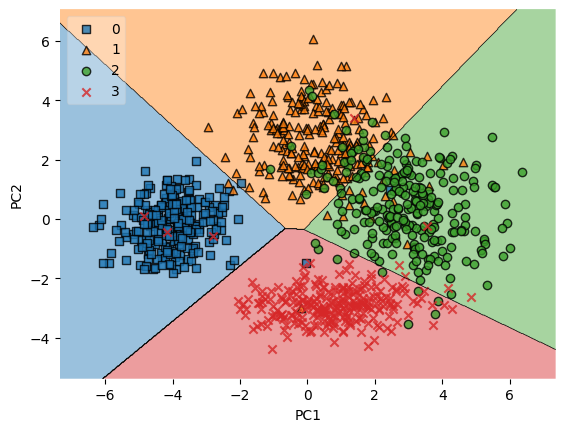

In [ ]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
model.fit(X_2d, y)

plot_decision_regions(X_2d, y, clf=model, legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#question1, 5

In [ ]:
!pip install drawdata

In [ ]:
!pip install pandas polars

In [ ]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

In [ ]:
# Get the drawn data as a list of dictionaries
widget.data

# Get the drawn data as a dataframe
widget.data_as_pandas

,x,y,color,label
0,109.241612,342.501416,#1f77b4,a
1,127.952081,344.257251,#1f77b4,a
2,123.606222,374.228278,#1f77b4,a
3,110.826329,362.326094,#1f77b4,a
4,106.744096,407.216945,#1f77b4,a
...,...,...,...,...
1440,561.100086,67.042459,#d62728,d
1441,539.173942,63.265008,#d62728,d
1442,557.468037,97.226302,#d62728,d
1443,534.946622,72.841934,#d62728,d


In [ ]:
import pandas as pd
df = pd.DataFrame(widget.data_as_pandas)

feature = df[['x', 'y']]
target = df['label']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(feature.values, target.values, test_size=0.2, random_state=74)

In [ ]:
model1_5 = LogisticRegression(random_state=74, max_iter=2000)
model1_5.fit(xtrain, ytrain)
y_pred = model1_5.predict(xtest)

acc_train1_5 = model1_5.score(xtrain, ytrain)
acc_test1_5 = model1_5.score(xtest, ytest)
print(f'trian accuracy = ', acc_train1_5)
print(f'test accuracy = ', acc_test1_5)

trian accuracy =  0.9835640138408305
test accuracy =  0.9792387543252595


In [ ]:
model2_5 = SGDClassifier(learning_rate='adaptive', eta0=0.09, random_state=74, max_iter=2000)
model2_5.fit(xtrain, ytrain)
y_pred = model2_5.predict(xtest)

acc_train2_5 = model2_5.score(xtrain, ytrain)
acc_test2_5 = model2_5.score(xtest, ytest)
print(f'trian accuracy = ', acc_train2_5)
print(f'test accuracy = ', acc_test2_5)

trian accuracy =  0.9403114186851211
test accuracy =  0.9238754325259516



### decision boundary


*   Logistic Regression



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


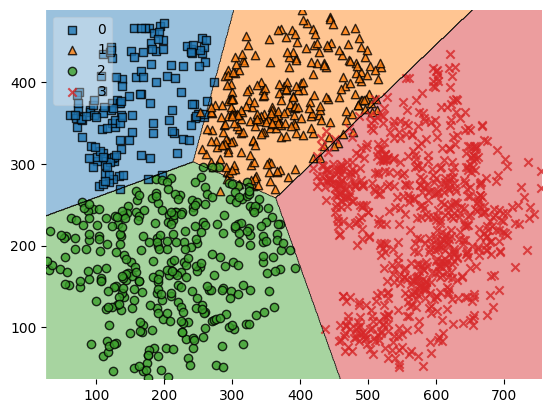

In [ ]:
from mlxtend.plotting import plot_decision_regions

label_mapping = {'a': 0, 'b': 1, 'c': 2, 'd': 3}
targets = target.map(label_mapping)

model1_5.fit(feature, targets)

plot_decision_regions(feature.values, targets.values.astype(np.int_), clf=model1_5, legend=2)

plt.show()




*   SGD classifier




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


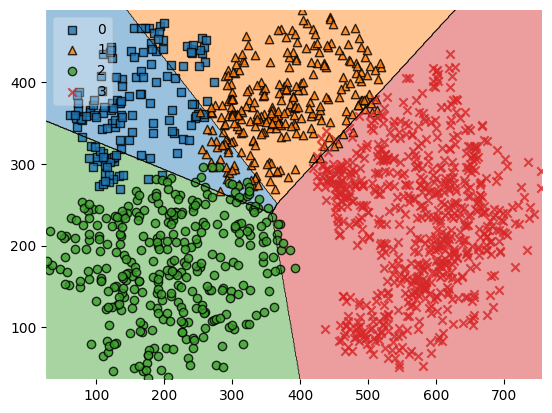

In [ ]:


model2_5.fit(feature, targets)

plot_decision_regions(feature.values, targets.values.astype(np.int_), clf=model2_5, legend=2)

plt.show()

# question2, 1 and 2

##a and 1:

In [2]:
!wget -q https://engineering.case.edu/sites/default/files/99.mat
!wget -q https://engineering.case.edu/sites/default/files/107.mat

In [3]:
import scipy.io as sio
import pandas as pd
import numpy as np

In [4]:
normal = sio.loadmat('/content/99.mat')
fault = sio.loadmat('/content/107.mat')

In [5]:
df = pd.DataFrame.from_dict(fault['X107_DE_time'])
data_fault = fault['X107_DE_time']
data_fault.shape


(122136, 1)

In [6]:
df = pd.DataFrame.from_dict(normal['X099_DE_time'])
data_normal = normal['X099_DE_time']
data_normal.shape

(485063, 1)

In [7]:
np.random.seed(0)   #static random numbers

matrix_normal = np.zeros((200, 200))
matrix_fault = np.zeros((200, 200))
used_indices1 = []
used_indices2 = []

length1 = data_normal.shape[0]
length2 = data_fault.shape[0]

for i in range(200):
    for j in range(200):
        random_index1 = np.random.randint(length1)
        random_index2 = np.random.randint(length2)

        while random_index1 in used_indices1:
          random_index1 = np.random.randint(length1)

        used_indices1.append(random_index1)
        #---------------------------------------------------
        while random_index2 in used_indices2:
          random_index2 = np.random.randint(length2)

        used_indices2.append(random_index2)


        matrix_fault[i][j] = data_fault[random_index2, 0]
        matrix_normal[i][j] = data_normal[random_index1, 0]


In [8]:
matrix_normaldf = pd.DataFrame(matrix_normal)
matrix_faultdf = pd.DataFrame(matrix_fault)
matrix_normaldf

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.123292,0.082820,0.050485,-0.028580,-0.086784,-0.017941,-0.036925,-0.012308,-0.014394,0.029832,...,0.050485,-0.062585,0.038594,-0.015020,-0.064462,0.011474,-0.038802,0.028789,0.070303,-0.030249
1,-0.019193,0.083863,0.009179,0.114113,0.014603,-0.008553,0.118702,-0.001669,0.044435,0.052571,...,0.025034,0.027954,-0.049442,0.027537,-0.037968,-0.035465,-0.021487,0.000626,-0.086993,0.036299
2,-0.002295,0.046104,0.095963,0.108897,0.036090,0.120788,-0.114321,-0.029415,-0.043392,-0.185250,...,0.019818,0.053614,-0.100135,0.074684,0.093877,0.065088,0.061542,0.093668,0.097423,0.011474
3,-0.045687,-0.047773,0.028163,0.000209,0.045061,0.061959,0.092208,0.042975,0.055074,0.077188,...,0.011474,-0.068634,0.099718,-0.057161,-0.023365,-0.076562,-0.112235,0.041723,-0.033587,0.046104
4,0.052988,-0.048190,0.024199,-0.074684,0.098884,0.028372,0.069886,0.070303,-0.071346,0.028998,...,-0.035047,0.023574,-0.086367,0.072390,-0.016063,-0.037134,0.082194,-0.028580,-0.050068,-0.040263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.102430,-0.055492,0.100344,0.160634,0.046730,-0.107228,-0.050068,0.075727,0.063628,0.079691,...,0.027537,0.061542,0.064045,0.081151,0.061542,-0.009388,-0.047982,0.074684,0.028998,-0.070929
196,0.169813,-0.064879,0.006884,0.117450,0.017524,0.024199,-0.031292,0.022322,0.017524,0.011682,...,0.050068,0.075102,0.076353,-0.121414,0.047773,-0.046521,0.024825,0.020236,-0.005424,0.047147
197,0.034213,0.075727,0.038385,-0.119745,0.079691,0.057369,-0.036716,0.101387,-0.070512,0.018150,...,0.089287,0.068009,0.000834,-0.085115,0.006467,0.000209,0.013560,0.043183,0.019401,-0.029415
198,-0.007093,0.006676,-0.060498,-0.046313,0.029623,0.012934,0.096798,0.119954,0.122457,-0.067383,...,0.006676,-0.086367,0.062585,0.048607,-0.064671,-0.081569,0.109314,0.033587,-0.136434,0.106185


##b:

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

In [10]:
#feature extraction:

def peak(column):
    return np.max(column)

def RMS(column):
    N = len(column)
    return np.sqrt(1/N * (column**2).sum())

def absolte_mean(column):
    N = len(column)
    return 1/N * (np.abs(column).sum())

def peak_to_peak(column):
    return np.ptp(column)

def extract_features(df):
    features = {
        'Skewness': df.apply(skew, axis=1),
        'Kurtosis': df.apply(kurtosis, axis=1),
        'Peak': df.apply(peak, axis=1),
        'Mean': df.mean(axis=1),
        'Root Mean Square': df.apply(RMS, axis=1),
        'Standard Deviation': df.std(axis=1),
        'Absolute Mean': df.apply(absolte_mean, axis=1),
        'peak to peak': df.apply(peak_to_peak, axis=1)
    }
    return pd.DataFrame(features)


new_dataset_normal = extract_features(matrix_normaldf)
new_dataset_fault = extract_features(matrix_faultdf)

new_dataset_normal['target'] = 1   #normal
new_dataset_fault['target'] = 0   #fault


In [11]:
new_dataset_fault

,Skewness,Kurtosis,Peak,Mean,Root Mean Square,Standard Deviation,Absolute Mean,peak to peak,target
0,-0.765187,2.975169,1.035524,0.028118,0.305203,0.304668,0.216837,2.143981,0
1,0.121493,1.763752,1.050955,0.054444,0.299530,0.295279,0.217519,2.177118,0
2,-0.510576,1.911126,0.806653,-0.002732,0.276522,0.277203,0.202056,1.803192,0
3,0.070982,2.460602,1.225248,0.011978,0.296121,0.296621,0.214228,2.269056,0
4,0.118718,4.287432,1.446322,-0.022786,0.307179,0.307102,0.203845,2.557216,0
...,...,...,...,...,...,...,...,...,...
195,-0.398298,2.113913,1.144843,0.002268,0.327938,0.328753,0.234391,2.256711,0
196,0.174745,1.425895,0.951870,-0.002994,0.265302,0.265950,0.201537,1.819436,0
197,-0.212661,1.727762,0.802105,0.005644,0.279975,0.280621,0.200564,1.754787,0
198,0.132225,1.696879,0.969575,0.016521,0.268456,0.268620,0.200307,1.892207,0


###try on sample df:

In [12]:
df = pd.DataFrame({
    'Feature_1': [2, 9, 2],
    'Feature_2': [3, 6, 1],
    'Feature_3': [8, 10, 4],
    'Feature_4': [4, 2, 7],
    'Feature_5': [1, 7, 5]
})

df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,2,3,8,4,1
1,9,6,10,2,7
2,2,1,4,7,5


In [13]:
new_df = extract_features(df)
new_df

,Skewness,Kurtosis,Peak,Mean,Root Mean Square,Standard Deviation,Absolute Mean,peak to peak
0,0.897896,-0.494746,8,3.6,4.335897,2.701851,3.6,7
1,-0.626178,-0.809491,10,6.8,7.348469,3.114482,6.8,8
2,0.138023,-1.279317,7,3.8,4.358899,2.387467,3.8,6


##c:

In [15]:
final_df = pd.concat([new_dataset_normal, new_dataset_fault], ignore_index= True)

In [16]:
final_df

,Skewness,Kurtosis,Peak,Mean,Root Mean Square,Standard Deviation,Absolute Mean,peak to peak,target
0,0.126706,-0.610466,0.175028,0.007080,0.065292,0.065070,0.054492,0.309585,1
1,0.107358,-0.029608,0.172942,0.010393,0.062205,0.061485,0.048987,0.333367,1
2,-0.365477,-0.135627,0.169604,0.010794,0.067818,0.067122,0.055216,0.354855,1
3,0.012804,-0.119853,0.162929,0.019218,0.061223,0.058274,0.048785,0.300406,1
4,-0.093829,-0.158418,0.189631,0.013901,0.063630,0.062249,0.051456,0.340252,1
...,...,...,...,...,...,...,...,...,...
395,-0.398298,2.113913,1.144843,0.002268,0.327938,0.328753,0.234391,2.256711,0
396,0.174745,1.425895,0.951870,-0.002994,0.265302,0.265950,0.201537,1.819436,0
397,-0.212661,1.727762,0.802105,0.005644,0.279975,0.280621,0.200564,1.754787,0
398,0.132225,1.696879,0.969575,0.016521,0.268456,0.268620,0.200307,1.892207,0


In [17]:
#data shuffling:

final_df = final_df.sample(frac=1).reset_index(drop=True)
final_df


,Skewness,Kurtosis,Peak,Mean,Root Mean Square,Standard Deviation,Absolute Mean,peak to peak,target
0,-0.030326,-0.090937,0.183790,0.018659,0.064784,0.062194,0.052131,0.333576,1
1,-0.282376,1.650200,0.761821,-0.025540,0.305657,0.305353,0.223233,1.895943,0
2,0.417843,0.854105,0.824521,-0.002755,0.280236,0.280925,0.212386,1.640270,0
3,-0.645937,2.186247,0.711628,0.007464,0.269716,0.270290,0.200866,1.852735,0
4,0.286201,2.083616,0.993453,0.000541,0.296676,0.297420,0.217757,2.134073,0
...,...,...,...,...,...,...,...,...,...
395,0.063162,-0.225451,0.183373,0.007262,0.066344,0.066111,0.053481,0.348388,1
396,0.274329,2.805283,1.160924,0.012274,0.306417,0.306939,0.215845,2.302518,0
397,0.471795,3.033406,1.451195,0.043531,0.330100,0.328038,0.233232,2.491917,0
398,-0.161619,-0.508407,0.160425,0.016821,0.067722,0.065764,0.055615,0.308125,1


In [28]:
from sklearn.model_selection import train_test_split

y = final_df['target'].values
X = final_df.iloc[:, :2].values  #except for the last column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 74)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((268, 2), (132, 2), (268,), (132,))

##d:

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#question2, 3

In [100]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))


# model
def logistic_regression(x, w):
  y_hat = sigmoid(x @ w)
  return y_hat

# y_hat = logistic_regression(np.random.randn(134, 9), np.random.randn(9, 1))

In [ ]:
# y_hat

In [39]:
def bce(y, y_hat):
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  return loss

# bce(y_train, y_hat)

In [41]:
#weight update algorithm:

def gradient(x, y, y_hat):
  grads = (x.T @ (y_hat - y)) / len(y)
  return grads

def gradient_descent(w, learning_rate, grads):
  w -= learning_rate*grads
  return w

In [42]:
# gradient(np.random.randn(134, 9), np.ones((134,)), y_hat).shape

In [44]:
def accuracy(y, y_hat):
  return np.sum(y==np.round(y_hat)) / len(y)

In [75]:
X_train_plus = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


w = np.random.randn(X_train_plus.shape[1], 1)      #one more for intercept
print(f'first random w: \n {w.T}')

first random w: 
 [[-0.15675128  0.76575558  0.30913486]]


In [76]:
#training:

learning_rate = 0.01
max_iter = 500
errors = []

for epoch in range(max_iter):
  y_hat = logistic_regression(X_train_plus, w)

  error = bce(y_train, y_hat)     #calculate the loss
  errors.append(error)

  #update w:
  grads = gradient(X_train_plus, y_train, y_hat)
  w = gradient_descent(w, learning_rate, grads)

  if (epoch % 10 == 0):
    print(f'Epoch={epoch}, \t error= {error:.4} \n ---------')

  # if(epoch == 1999): print(y_hat)

Epoch=0, 	 error= 1.042 
 ---------
Epoch=10, 	 error= 1.0 
 ---------
Epoch=20, 	 error= 0.9599 
 ---------
Epoch=30, 	 error= 0.9217 
 ---------
Epoch=40, 	 error= 0.8853 
 ---------
Epoch=50, 	 error= 0.8508 
 ---------
Epoch=60, 	 error= 0.818 
 ---------
Epoch=70, 	 error= 0.7871 
 ---------
Epoch=80, 	 error= 0.7579 
 ---------
Epoch=90, 	 error= 0.7303 
 ---------
Epoch=100, 	 error= 0.7043 
 ---------
Epoch=110, 	 error= 0.6799 
 ---------
Epoch=120, 	 error= 0.6568 
 ---------
Epoch=130, 	 error= 0.6352 
 ---------
Epoch=140, 	 error= 0.6149 
 ---------
Epoch=150, 	 error= 0.5957 
 ---------
Epoch=160, 	 error= 0.5778 
 ---------
Epoch=170, 	 error= 0.5608 
 ---------
Epoch=180, 	 error= 0.5449 
 ---------
Epoch=190, 	 error= 0.5299 
 ---------
Epoch=200, 	 error= 0.5158 
 ---------
Epoch=210, 	 error= 0.5024 
 ---------
Epoch=220, 	 error= 0.4899 
 ---------
Epoch=230, 	 error= 0.478 
 ---------
Epoch=240, 	 error= 0.4667 
 ---------
Epoch=250, 	 error= 0.456 
 ---------
Epoc

In [77]:
accuracy(y_train, y_hat)

0.9738805970149254

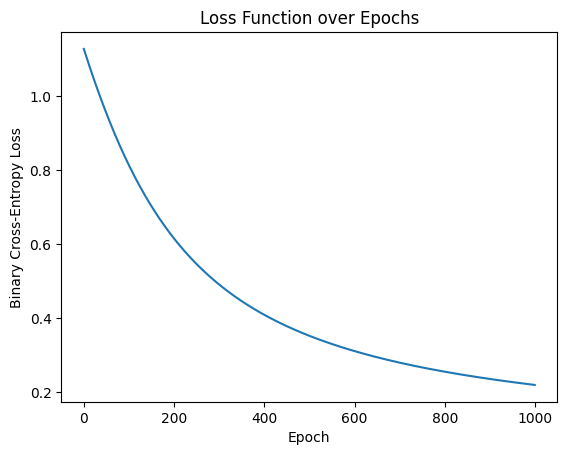

In [49]:
import matplotlib.pyplot as plt

# After the training loop
plt.plot(errors)
plt.title('Loss Function over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.show()

In [80]:
#predict:
X_test_plus = np.hstack((np.ones((X_test.shape[0], 1)), X_test_scaled))

y_pred = logistic_regression(X_test_plus, w)

accuracy(y_test, y_pred)

0.9545454545454546

#question2, 4

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

In [59]:
#trianing and predicting using sklearn

model = LogisticRegression(random_state = 74, max_iter = 1000).fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

acc_train = model.score(X_train_scaled, y_train.ravel())
acc_test = model.score(X_test_scaled, y_test.ravel())
print(f'trian accuracy = ', acc_train)
print(f'test accuracy = ', acc_test)

trian accuracy =  0.996268656716418
test accuracy =  0.9621212121212122


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

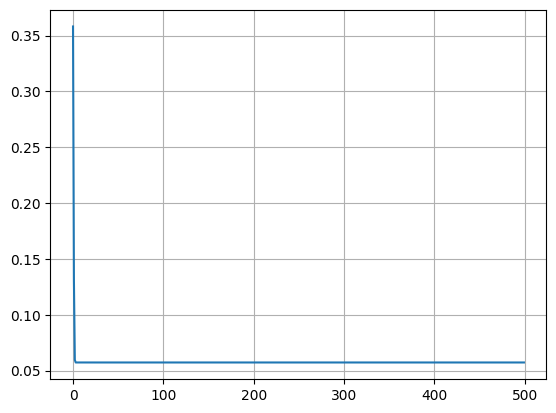

In [120]:
model = LogisticRegression(random_state=74, max_iter=1, warm_start=True)

errors = []
iter = 500

for i in range(iter):
    model.set_params(max_iter=i+1)
    model.fit(X_train_scaled, y_train.ravel())

    prob = model.predict_proba(X_train_scaled)
    loss = log_loss(y_train, prob[:, 1])
    errors.append(loss)

plt.plot(errors)
plt.grid(True)
plt.show()

#question3, 1

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Hsn6xDLdeJyM_xne0B5ssJN1lpkmGhPL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df3 = pd.read_csv('weatherHistory.csv')

In [ ]:
df3

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
df3['Precip Type'].fillna(0, inplace= True)

<Axes: >

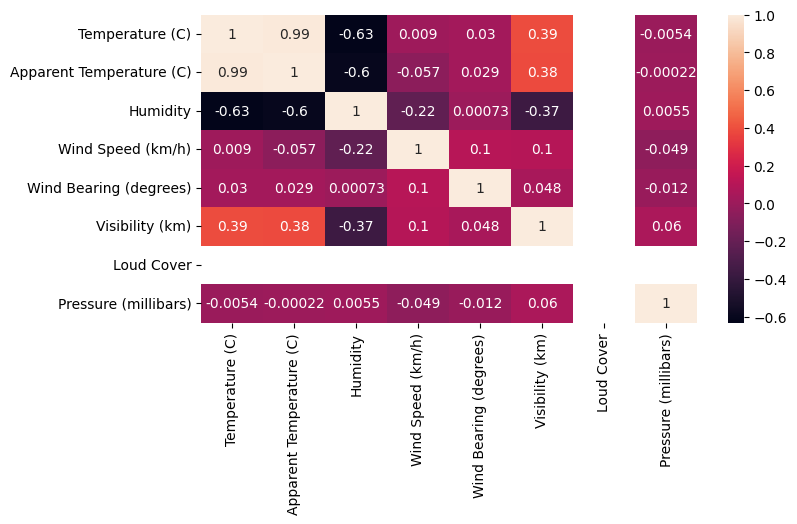

In [ ]:
corr_matrix = df3.corr(numeric_only=True)
plt.figure(figsize = (8, 4))
sns.heatmap(corr_matrix, annot=True)

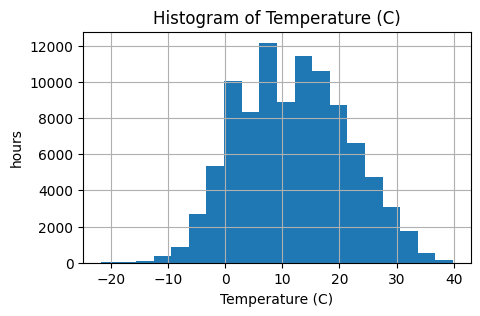

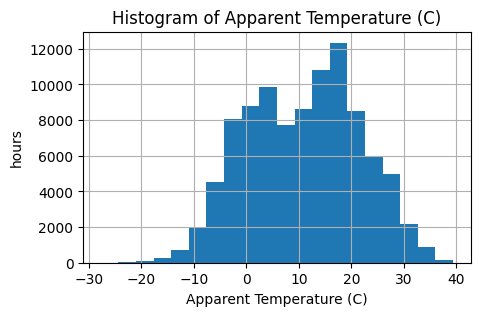

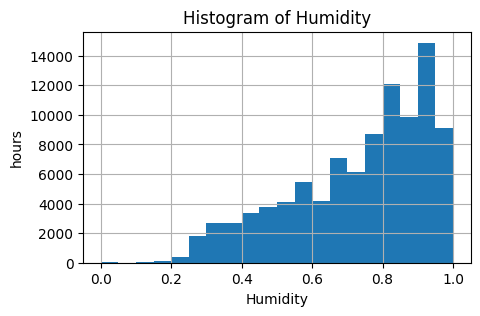

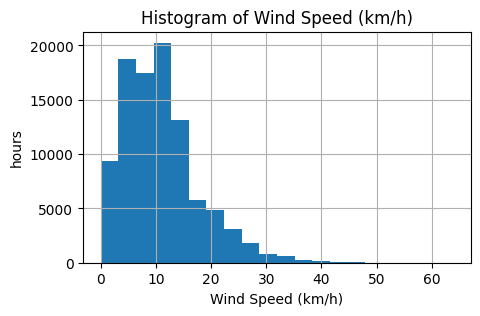

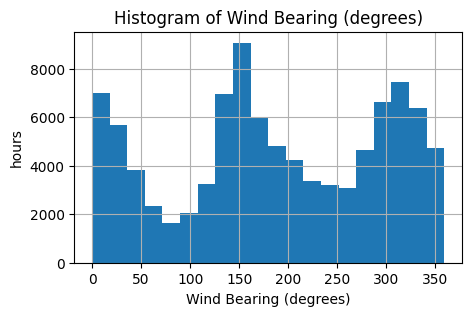

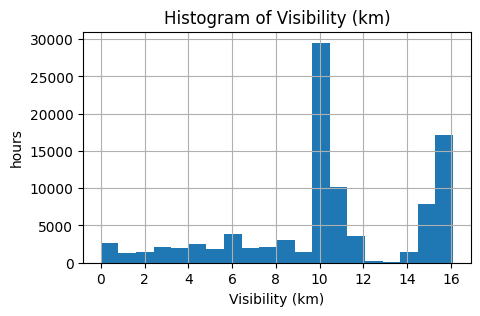

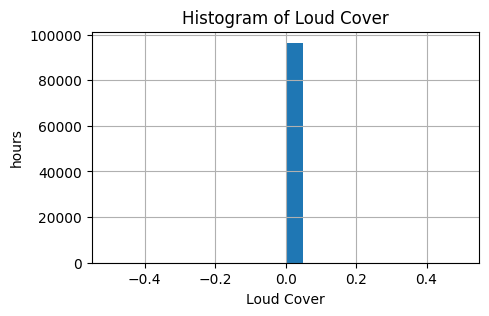

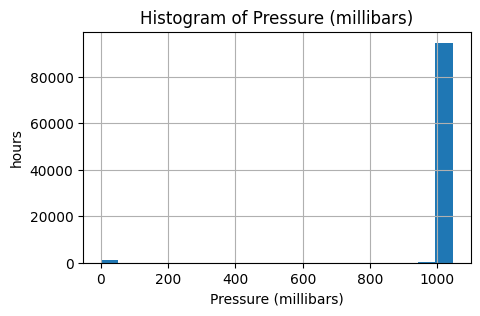

In [ ]:
numerical_columns = df3.select_dtypes(include='number').columns

for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    df3[column].hist(bins = 20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('hours')
    plt.show()

#question3, 2

In [ ]:
df3.keys()

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')



###  try1. using Humidity as the feature:




Mean Squared Error:  54.33562382492751


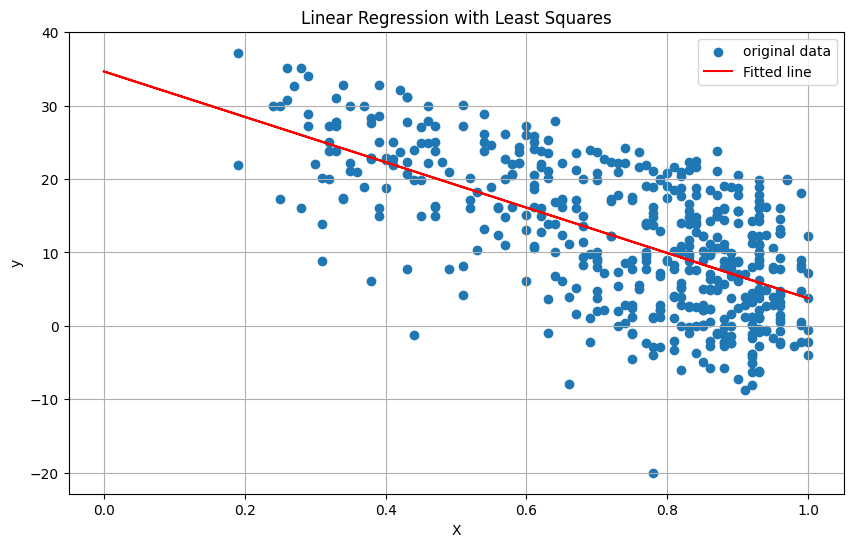

In [ ]:
class LinearRegressionLS:
  def __init__(self):
    self.coefficients = None


  def fit(self, X, y):
    X = np.column_stack((np.ones(len(X)), X))
    self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return self

  def predict(self, X):
    X = np.column_stack((np.ones(len(X)), X))
    return X.dot(self.coefficients)


if __name__ == "__main__":
  y = df3['Temperature (C)']
  X = df3['Humidity']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=74)


  model3_2 = LinearRegressionLS().fit(X_train, y_train)
  y_pred = model3_2.predict(X_test)

  mse = np.mean((y_test - y_pred)**2)
  print("Mean Squared Error: ", mse)

  #plot the fitted line:
  df3_sample = df3.sample(n=500, axis=0, random_state=74)
  y_sample = df3_sample['Temperature (C)']
  X_sample = df3_sample['Humidity']


  plt.figure(figsize = (10, 6))
  plt.scatter(X_sample, y_sample, label = 'original data')
  plt.plot(X_test, y_pred, color='red', label='Fitted line')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title('Linear Regression with Least Squares')
  plt.legend()
  plt.grid(True)
  plt.show()

###  try2. using Humidity ans visibility as the features:

In [ ]:
if __name__ == "__main__":
  y = df3['Temperature (C)']
  X = df3[['Humidity', 'Visibility (km)', 'Wind Speed (km/h)']]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=74)


  model3_2 = LinearRegressionLS().fit(X_train, y_train)
  y_pred = model3_2.predict(X_test)

  mse = np.mean((y_test - y_pred)**2)
  print("Mean Squared Error: ", mse)


Mean Squared Error:  49.65816748882232


###RLS:

In [ ]:
class RecursiveLS:
  def __init__(self, n_features, forgetting_factor):
    #model parameters
    self.n_features = n_features
    self.forgetting_factor = forgetting_factor
    self.theta = np.zeros((n_features, 1))
    self.P = np.eye(n_features)      #covariance matrix

  def fit(self, X, y):
    errors = []
    for i in range(len(X)):
      x_i = X[i].reshape(-1, 1)
      y_i = y[i]

      y_pred = np.dot(x_i.T, self.theta)  #.T is used for more that one feature.

      error= y_i - y_pred
      errors.append(error)
      K = np.dot(self.P, x_i)/(self.forgetting_factor + np.dot(np.dot(x_i.T, self.P), x_i))
      self.theta = self.theta + np.dot(K, error)
      self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x_i.T, self.P)))

    return errors

  def predict(self, X):
    return np.dot(X, self.theta)









Mean Squared Error:  134.58643905515763


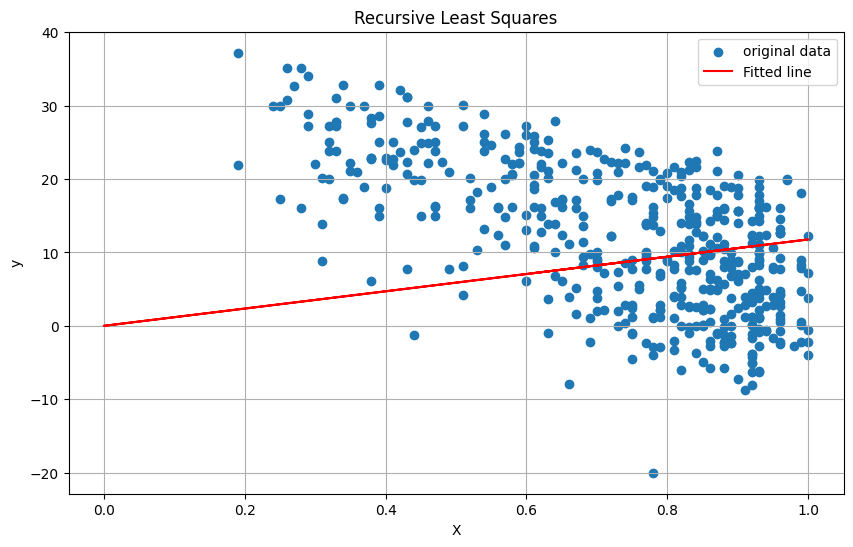

In [ ]:
  y = df3['Temperature (C)'].values
  X = df3['Humidity'].values.reshape(-1, 1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=74)

  rls = RecursiveLS(n_features = 1, forgetting_factor = 0.99)
  errors = rls.fit(X_train, y_train)

  y_pred = rls.predict(X_test)

  mse = np.mean(np.array(errors)**2)
  print("Mean Squared Error: ", mse)


  #plot the fitted line:
  df3_sample = df3.sample(n=500, axis=0, random_state=74)
  y_sample = df3_sample['Temperature (C)']
  X_sample = df3_sample['Humidity']

  plt.figure(figsize = (10, 6))
  plt.scatter(X_sample, y_sample, label = 'original data')
  plt.plot(X_test, y_pred, color='red', label='Fitted line')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.title('Recursive Least Squares')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
  y = df3['Temperature (C)'].values
  X = df3[['Humidity', 'Visibility (km)', 'Wind Bearing (degrees)']].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=74)

  rls = RecursiveLS(n_features = X_train.shape[1], forgetting_factor = 0.99)
  errors = rls.fit(X_train, y_train)

  y_pred = rls.predict(X_test)

  mse = np.mean(np.array(errors)**2)
  print("Mean Squared Error: ", mse)

Mean Squared Error:  75.94080301748332


#question3, 3

In [ ]:
import statsmodels.api as sm

y = df3['Temperature (C)'].values
X = df3['Humidity'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=74)


error_variance = 5
weight = 1/error_variance

X_with_intercept = sm.add_constant(X_train)
wls = sm.WLS(y_train, X_with_intercept, weights = weight)
result = wls.fit()

X_test_with_intercept = sm.add_constant(X_test)
y_pred = result.predict(X_test_with_intercept)

print(result.summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.399
Model:                            WLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                 5.128e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:42:36   Log-Likelihood:            -2.6400e+05
No. Observations:               77162   AIC:                         5.280e+05
Df Residuals:                   77160   BIC:                         5.280e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6469      0.104    333.686      0.0